<a href="https://colab.research.google.com/github/Tatutina/HeartDisease_Project/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Статистический анализ

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency, mannwhitneyu, ttest_ind, shapiro

# Загрузка данных
heart = pd.read_csv('/content/drive/MyDrive/HeartDisease_Project/data/heart1.csv')
heart.head().T # выведем первые 5 строк таблицы

,0,1,2,3,4
ЛПНП,2.79,2.74,5.37,3.77,2.42
Возраст алког,18.0,13.0,12.0,22.0,16.0
Работа,1,1,0,0,0
Статус Курения,Курит,Бросил(а),Бросил(а),Курит,Бросил(а)
Пассивное курение,0,1,1,0,0
Переломы,0,0,0,1,1
ЛПВП,0.97,0.68,0.57,0.91,1.55
Выход на пенсию,0,0,1,1,0
Холестерин,4.0,4.9,7.8,4.9,4.2
Артериальная гипертония,0,1,1,0,0


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ЛПНП                                    405 non-null    float64
 1   Возраст алког                           371 non-null    float64
 2   Работа                                  405 non-null    int64  
 3   Статус Курения                          405 non-null    object 
 4   Пассивное курение                       405 non-null    int64  
 5   Переломы                                405 non-null    int64  
 6   ЛПВП                                    405 non-null    float64
 7   Выход на пенсию                         405 non-null    int64  
 8   Холестерин                              405 non-null    float64
 9   Артериальная гипертония                 405 non-null    int64  
 10  Триглицериды                            405 non-null    float6

In [6]:
print(heart.isnull().sum())

ЛПНП                                        0
Возраст алког                              34
Работа                                      0
Статус Курения                              0
Пассивное курение                           0
Переломы                                    0
ЛПВП                                        0
Выход на пенсию                             0
Холестерин                                  0
Артериальная гипертония                     0
Триглицериды                                0
Гепатит                                     0
Сахарный диабет                             0
Пол                                         0
Спорт, клубы                                0
Семья                                       0
Религия, клубы                              0
Частота пасс кур                          331
Возраст курения                             0
Травмы за год                               0
Регулярный прием лекарственных средств      0
Национальность                    

In [7]:
heart.nunique()

,0
ЛПНП,266
Возраст алког,25
Работа,2
Статус Курения,2
Пассивное курение,2
Переломы,2
ЛПВП,126
Выход на пенсию,2
Холестерин,57
Артериальная гипертония,2


In [10]:
heart.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ЛПНП,405.0,3.90,1.50,1.28,2.76,3.40,4.89,7.91
Возраст алког,371.0,19.34,4.28,6.00,17.00,18.00,20.00,50.00
Работа,405.0,0.58,0.49,0.00,0.00,1.00,1.00,1.00
Пассивное курение,405.0,0.18,0.39,0.00,0.00,0.00,0.00,1.00
Переломы,405.0,0.38,0.49,0.00,0.00,0.00,1.00,1.00
ЛПВП,405.0,0.97,0.33,-0.38,0.78,0.97,1.20,1.71
Выход на пенсию,405.0,0.26,0.44,0.00,0.00,0.00,1.00,1.00
Холестерин,405.0,5.74,1.62,3.60,4.40,5.10,7.10,9.20
Артериальная гипертония,405.0,0.44,0.50,0.00,0.00,0.00,1.00,1.00
Триглицериды,405.0,1.91,1.43,0.33,0.84,1.39,2.61,8.79


# Проверка нормальности распределения

In [8]:
import pandas as pd
from scipy.stats import shapiro

# допустим, у тебя уже есть heart
numeric_cols = heart.select_dtypes(include='number').columns

results = []

for col in numeric_cols:
    # берём столбец без пропусков
    data = heart[col].dropna()
    # тест Шапиро–Уилка (важно: n <= 5000)
    stat, p = shapiro(data)
    results.append({
        "Показатель": col,
        "W": round(stat, 3),
        "p_value": round(p, 4),
        "Нормально?": "да" if p > 0.05 else "нет"
    })

shapiro_df = pd.DataFrame(results)
display(shapiro_df)


,Показатель,W,p_value,Нормально?
0,ЛПНП,0.901,0.0,нет
1,Возраст алког,0.817,0.0,нет
2,Работа,0.628,0.0,нет
3,Пассивное курение,0.470,0.0,нет
4,Переломы,0.616,0.0,нет
5,ЛПВП,0.981,0.0,нет
6,Выход на пенсию,0.546,0.0,нет
7,Холестерин,0.899,0.0,нет
8,Артериальная гипертония,0.631,0.0,нет
9,Триглицериды,0.849,0.0,нет


# Сравнительный анализ количественных данных

In [9]:
import pandas as pd
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

results_num = []

numeric_cols = heart.select_dtypes(include='number').columns
numeric_cols = [c for c in numeric_cols if c != 'ССЗ']  # целевую убираем

for col in numeric_cols:
    grp1 = heart.loc[heart['ССЗ'] == 1, col].dropna()
    grp0 = heart.loc[heart['ССЗ'] == 0, col].dropna()

    # Шапиро–Уилк (ограничение: до 5000 наблюдений) [web:135]
    n1 = min(len(grp1), 5000)
    n0 = min(len(grp0), 5000)
    p_norm1 = shapiro(grp1.sample(n1, random_state=42) if len(grp1) > 5000 else grp1)[1]
    p_norm0 = shapiro(grp0.sample(n0, random_state=42) if len(grp0) > 5000 else grp0)[1]

    normal = (p_norm1 > 0.05) and (p_norm0 > 0.05)

    if normal:
        test_name = 't-test'
        stat, p = ttest_ind(grp1, grp0, equal_var=False)
    else:
        test_name = 'Mann-Whitney'
        stat, p = mannwhitneyu(grp1, grp0, alternative='two-sided')

    results_num.append({
        'Показатель': col,
        'Тест': test_name,
        'p_normal_grp1': round(p_norm1, 4),
        'p_normal_grp0': round(p_norm0, 4),
        'stat': round(stat, 3),
        'p_value': round(p, 4),
        'Есть различия?': 'да' if p < 0.05 else 'нет'
    })

num_stats_df = pd.DataFrame(results_num)
display(num_stats_df.sort_values('p_value'))


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


,Показатель,Тест,p_normal_grp1,p_normal_grp0,stat,p_value,Есть различия?
0,ЛПНП,Mann-Whitney,0.0003,0.0916,36681.0,0.0000,да
7,Холестерин,Mann-Whitney,0.0000,0.0000,39089.0,0.0000,да
6,Выход на пенсию,Mann-Whitney,0.0000,0.0000,24325.0,0.0000,да
5,ЛПВП,Mann-Whitney,0.0940,0.0026,9000.5,0.0000,да
9,Триглицериды,Mann-Whitney,0.0000,0.0000,36057.0,0.0000,да
8,Артериальная гипертония,Mann-Whitney,0.0000,1.0000,37240.0,0.0000,да
17,Глюкоза плазмы натощак,Mann-Whitney,0.0000,0.0000,30926.5,0.0000,да
16,Регулярный прием лекарственных средств,Mann-Whitney,0.0000,0.0000,28707.5,0.0000,да
22,"Индекс массы тела, кг/м^2",Mann-Whitney,0.0000,0.0551,29976.5,0.0000,да
18,"Абдоминальное ожирение, см",Mann-Whitney,0.0000,0.0000,33212.0,0.0000,да


/tmp/ipython-input-903513675.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-903513675.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-903513675.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-903513675.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-903513675.py:12: FutureWarning: 

Passing `pa

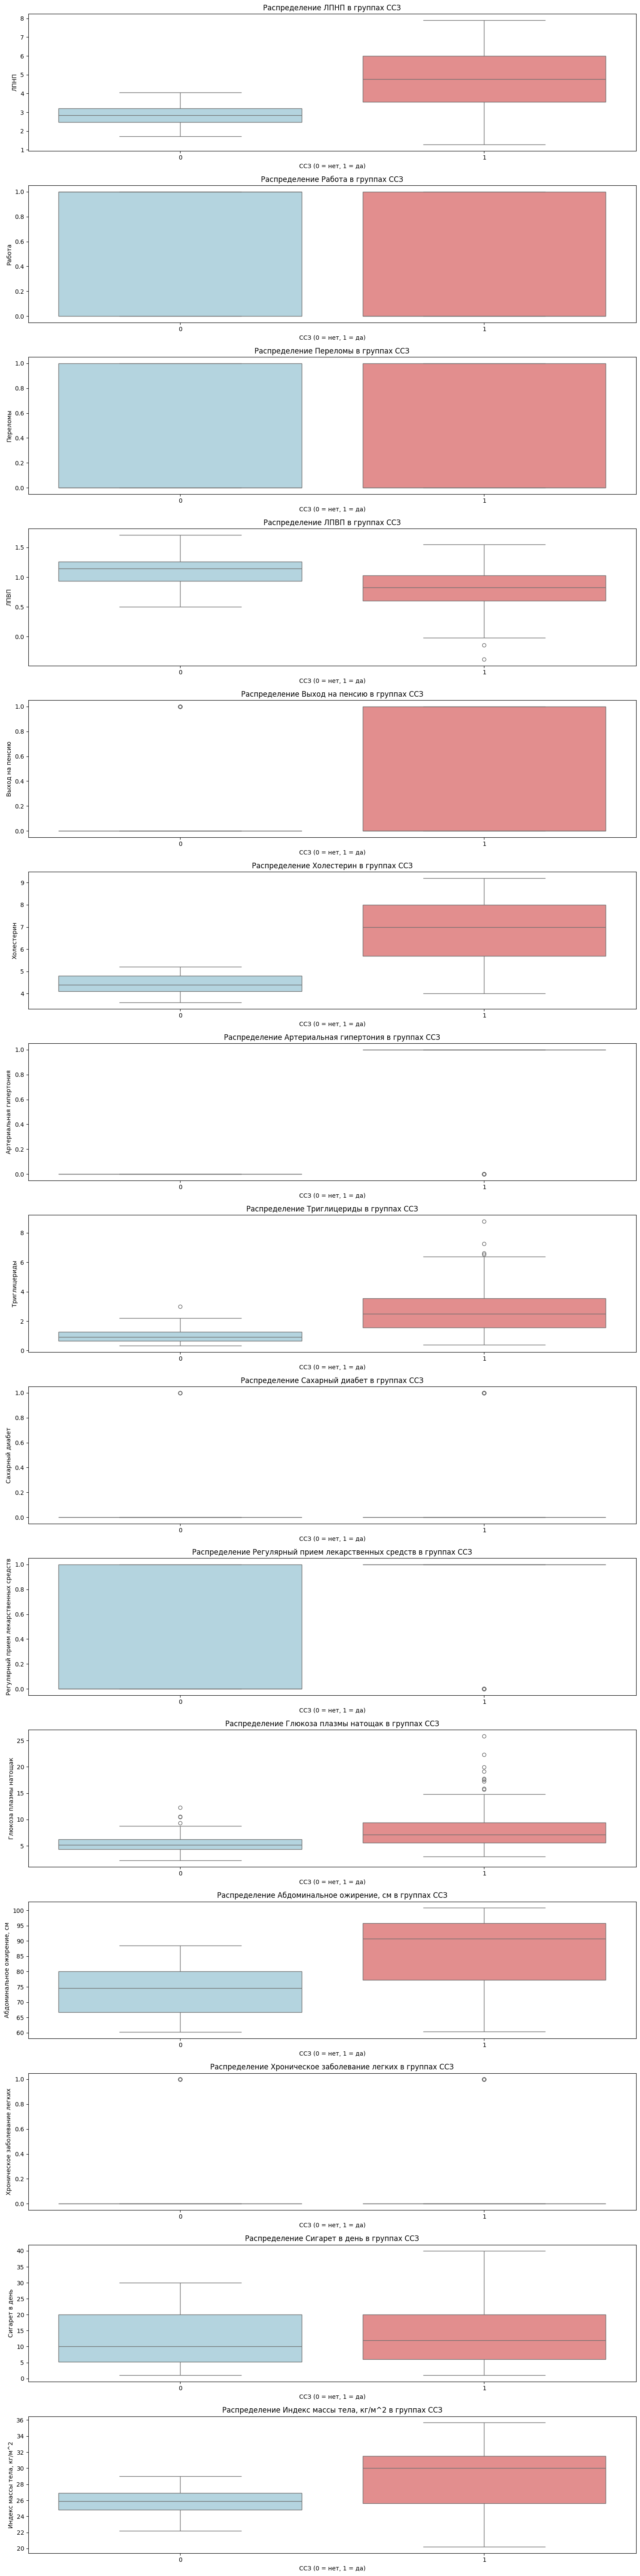

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

alpha = 0.05

significant_num = num_stats_df[num_stats_df['p_value'] < alpha]['Показатель'].tolist()

plt.figure(figsize=(15, 4 * len(significant_num)))

for i, col in enumerate(significant_num, 1):
    plt.subplot(len(significant_num), 1, i)
    sns.boxplot(
        data=heart,
        x='ССЗ',           # 0 / 1
        y=col,
        palette=['lightblue', 'lightcoral']
    )
    plt.title(f'Распределение {col} в группах ССЗ')
    plt.xlabel('ССЗ (0 = нет, 1 = да)')
    plt.ylabel(col)

plt.tight_layout()
plt.savefig('significant_numeric_boxplots.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# Сравнительный анаиз категориальных данных

In [12]:
from scipy.stats import chi2_contingency

results_cat = []

categorical_cols = heart.select_dtypes(include='object').columns

for col in categorical_cols:
    contingency = pd.crosstab(heart[col], heart['ССЗ'])

    # если в таблице меньше 2 строк или столбцов — пропускаем
    if contingency.shape[0] < 2 or contingency.shape[1] < 2:
        continue

    chi2, p, dof, expected = chi2_contingency(contingency)

    results_cat.append({
        'Показатель': col,
        'chi2': round(chi2, 3),
        'dof': dof,
        'p_value': round(p, 4),
        'Есть связь?': 'да' if p < 0.05 else 'нет'
    })

cat_stats_df = pd.DataFrame(results_cat)
display(cat_stats_df.sort_values('p_value'))

,Показатель,chi2,dof,p_value,Есть связь?
0,Статус Курения,3.749,1,0.0528,нет
6,Образование,6.035,3,0.1099,нет
8,Профессия,11.859,10,0.2946,нет
2,Семья,4.671,5,0.4573,нет
7,Религия,2.270,3,0.5183,нет
4,Национальность,10.050,12,0.6116,нет
3,Частота пасс кур,2.415,4,0.6600,нет
1,Пол,0.009,1,0.9226,нет
5,Алкоголь,0.031,2,0.9844,нет


In [13]:
alpha = 0.05
significant_cat = cat_stats_df[cat_stats_df['p_value'] < alpha]['Показатель'].tolist()

import numpy as np

plt.figure(figsize=(12, 4 * len(significant_cat)))

for i, col in enumerate(significant_cat, 1):
    plt.subplot(len(significant_cat), 1, i)

    # Доли ССЗ в каждой категории признака
    prop = (heart
            .groupby(col)['ССЗ']
            .mean()
            .reset_index()
           )
    sns.barplot(
        data=prop,
        x=col,
        y='ССЗ',
        color='lightcoral'
    )
    plt.ylabel('Доля ССЗ')
    plt.title(f'Доля пациентов с ССЗ по уровню фактора: {col}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig('significant_categorical_bars.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


/usr/local/lib/python3.12/dist-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/usr/local/lib/python3.12/dist-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/usr/local/lib/python3.12/dist-packages/matplotlib/patches.py:797: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/usr/local/lib/python3.12/dist-packages/matplotlib/transforms.py:2036: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


<Figure size 1200x0 with 0 Axes>

# Корреляционные зависимости

In [14]:
heart.corr(numeric_only=True).round(2)

,ЛПНП,Возраст алког,Работа,Пассивное курение,Переломы,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Возраст курения,Травмы за год,Регулярный прием лекарственных средств,Глюкоза плазмы натощак,"Абдоминальное ожирение, см",Сон после обеда,Хроническое заболевание легких,Сигарет в день,"Индекс массы тела, кг/м^2",ССЗ
ЛПНП,1.00,0.01,-0.10,0.01,0.13,-0.33,0.17,0.95,0.63,0.24,...,-0.01,-0.02,0.35,0.34,0.50,-0.02,0.11,0.07,0.40,0.66
Возраст алког,0.01,1.00,-0.03,-0.04,-0.07,0.08,0.12,0.03,0.00,0.01,...,0.46,-0.02,0.05,0.03,-0.15,-0.06,0.02,-0.03,-0.20,0.00
Работа,-0.10,-0.03,1.00,-0.01,-0.00,-0.02,-0.69,-0.14,-0.12,-0.12,...,-0.10,0.06,-0.13,-0.10,-0.02,-0.12,0.04,0.03,-0.06,-0.17
Пассивное курение,0.01,-0.04,-0.01,1.00,-0.02,0.12,-0.03,0.03,0.07,-0.02,...,-0.09,0.02,0.03,0.06,0.12,-0.10,-0.05,-0.02,0.11,0.06
Переломы,0.13,-0.07,-0.00,-0.02,1.00,-0.14,0.02,0.11,0.03,0.05,...,-0.07,0.15,0.04,0.02,0.20,0.02,0.07,0.08,0.13,0.11
ЛПВП,-0.33,0.08,-0.02,0.12,-0.14,1.00,-0.06,-0.38,-0.47,-0.68,...,0.13,-0.01,-0.16,-0.25,-0.65,-0.00,-0.05,-0.27,-0.59,-0.48
Выход на пенсию,0.17,0.12,-0.69,-0.03,0.02,-0.06,1.00,0.20,0.16,0.13,...,0.14,-0.02,0.19,0.11,0.09,0.15,-0.04,-0.06,0.12,0.22
Холестерин,0.95,0.03,-0.14,0.03,0.11,-0.38,0.20,1.00,0.74,0.48,...,0.03,-0.02,0.40,0.39,0.46,-0.04,0.12,0.00,0.36,0.75
Артериальная гипертония,0.63,0.00,-0.12,0.07,0.03,-0.47,0.16,0.74,1.00,0.62,...,0.01,0.00,0.37,0.46,0.49,-0.06,0.10,-0.04,0.39,0.83
Триглицериды,0.24,0.01,-0.12,-0.02,0.05,-0.68,0.13,0.48,0.62,1.00,...,0.04,0.01,0.26,0.30,0.33,-0.05,0.07,-0.01,0.28,0.60


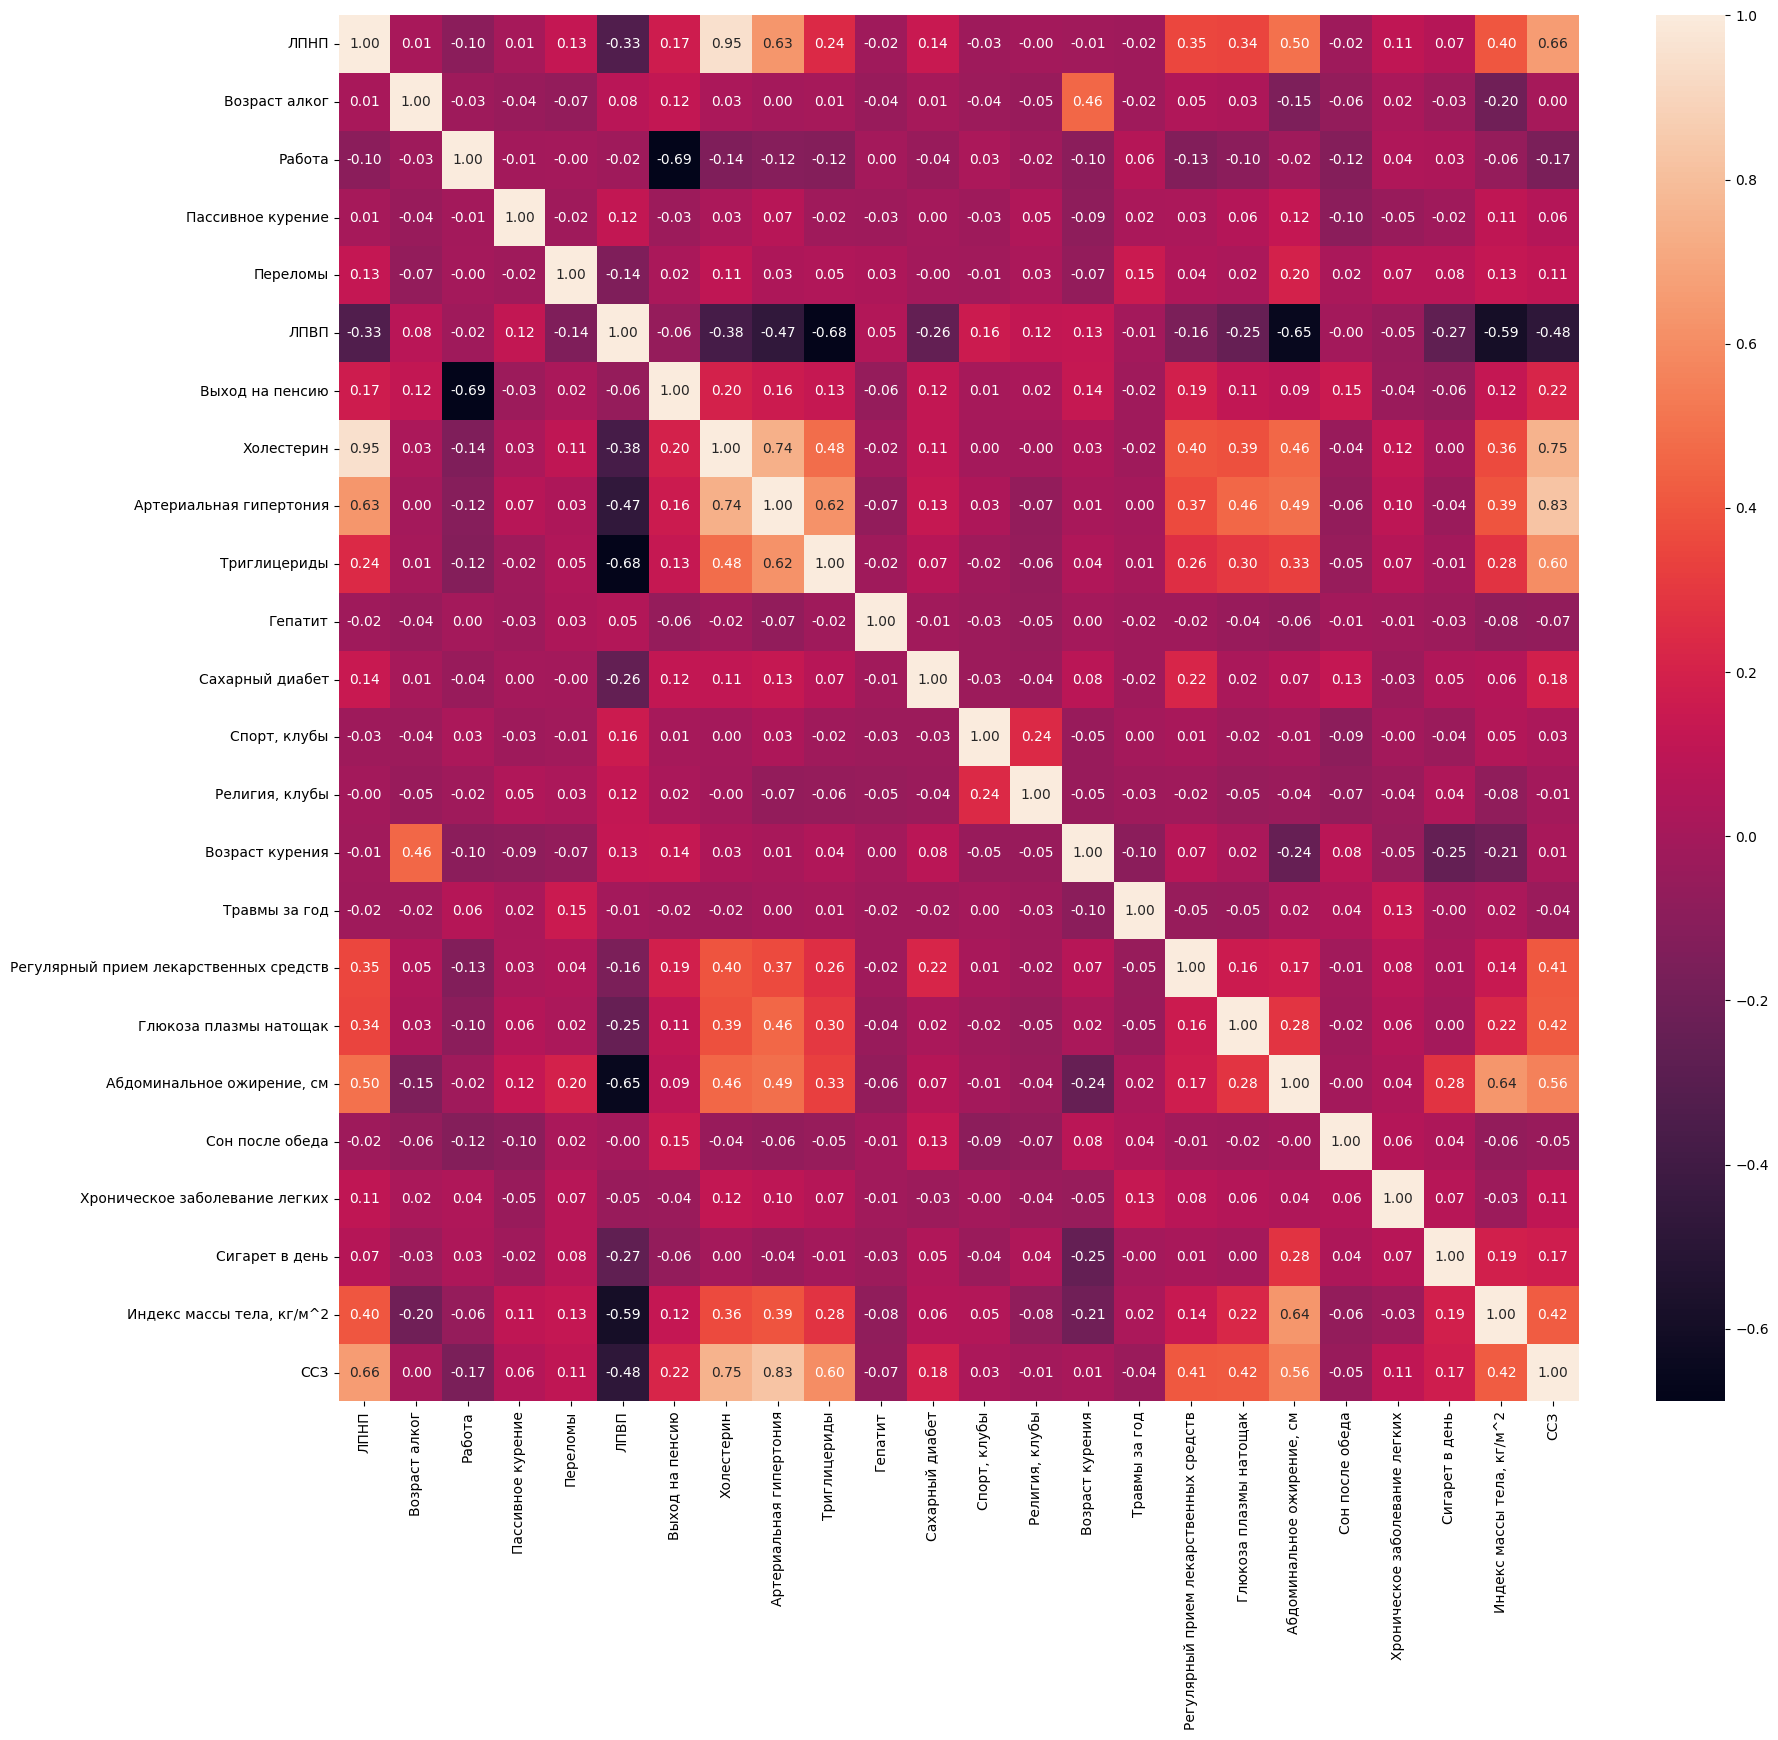

In [15]:
# тепловая карта
plt.figure(figsize = (20,18))
ax = sns.heatmap(heart.corr(numeric_only=True), annot = True, fmt = ".2f")

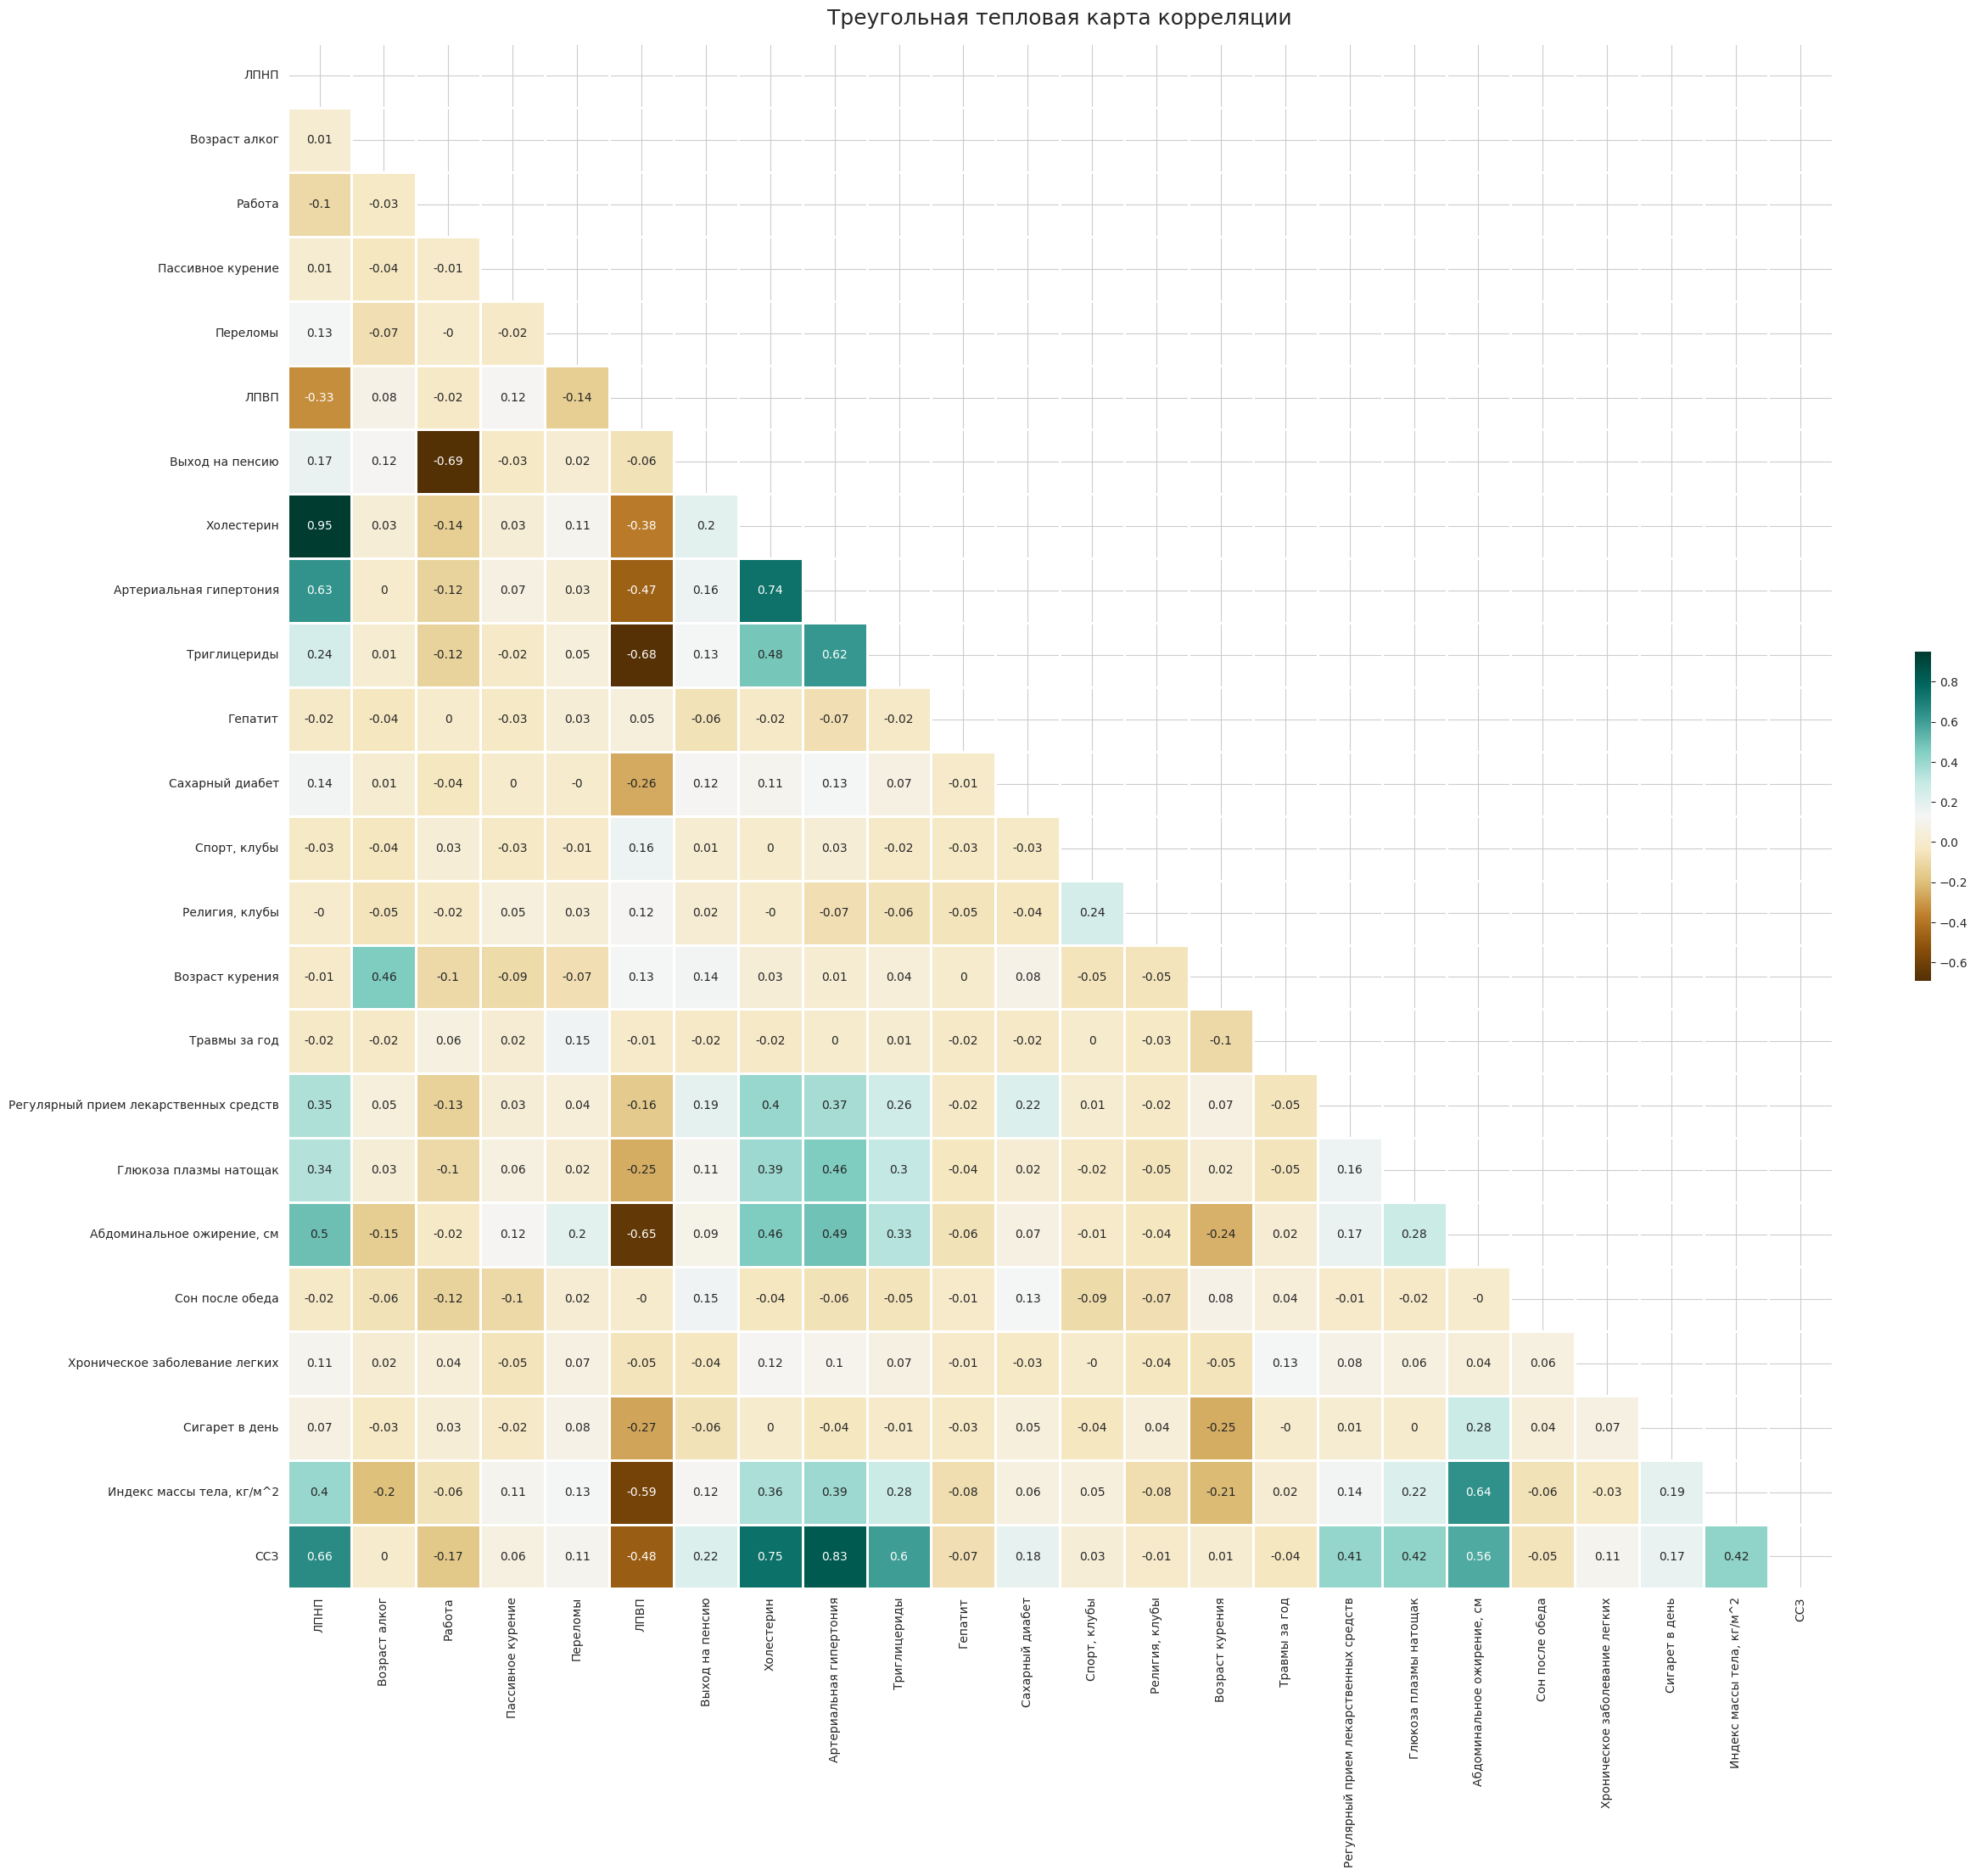

In [25]:
plt.rcParams["figure.figsize"] = (25, 25)
sns.set_style("whitegrid")

mask = np.triu(np.ones_like(heart.corr(numeric_only=True), dtype=bool))

heatmap = sns.heatmap(
    heart.corr(numeric_only=True).round(2),
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,

    mask=mask,
)

heatmap.set_title(
    "Треугольная тепловая карта корреляции", fontdict={"fontsize": 18}, pad=16
);
plt.savefig('Треугольная тепловая карта', dpi=300, bbox_inches='tight', facecolor='white')

In [17]:
corr = heart.corr(numeric_only=True).round(4)
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

,ЛПНП,Холестерин,Артериальная гипертония,ССЗ
ЛПНП,1.0000,0.9536,0.6321,0.6576
Холестерин,0.9536,1.0000,0.7408,0.7541
Артериальная гипертония,0.6321,0.7408,1.0000,0.8283
ССЗ,0.6576,0.7541,0.8283,1.0000


In [15]:
heart = heart.drop(columns=['ЛПНП'], axis=1)

# Отчет

In [19]:
!pip install reportlab -q

import os
from reportlab.lib.pagesizes import A4
from reportlab.lib.units import inch
from reportlab.platypus import (
    SimpleDocTemplate, Paragraph, Spacer, Image,
    Table, TableStyle, PageBreak, Preformatted
)
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib import colors
from google.colab import files

# 1. Регистрируем шрифт с кириллицей (если ещё не сделали)
# скачай заранее DejaVuSans.ttf в /content или в папку проекта
font_path = "/content/drive/MyDrive/HeartDisease_Project/DejaVuSans.ttf"
pdfmetrics.registerFont(TTFont("DejaVuSans", font_path))

styles = getSampleStyleSheet()
styles.add(ParagraphStyle(
    name="RusTitle", fontName="DejaVuSans",
    fontSize=18, leading=22, spaceAfter=12, alignment=1
))
styles.add(ParagraphStyle(
    name="RusHeading", fontName="DejaVuSans",
    fontSize=14, leading=18, spaceAfter=8
))
styles.add(ParagraphStyle(
    name="RusNormal", fontName="DejaVuSans",
    fontSize=11, leading=14, spaceAfter=6
))
styles.add(ParagraphStyle(
    name="RusMono", fontName="DejaVuSans",
    fontSize=8, leading=10
))

# 2. Путь к PDF
reports_dir = "/content/drive/MyDrive/HeartDisease_Project/reports"
os.makedirs(reports_dir, exist_ok=True)
pdf_file = os.path.join(reports_dir, "Heart_Analysis_full.pdf")

doc = SimpleDocTemplate(pdf_file, pagesize=A4)
elements = []

## ===== ТИТУЛЬНЫЙ БЛОК =====

In [20]:
elements.append(Paragraph("Анализ сердечно‑сосудистых заболеваний (ССЗ)", styles["RusTitle"]))
elements.append(Paragraph(
    "Отчет по предобработке данных, описательной статистике, проверке гипотез и визуализации факторов риска.",
    styles["RusNormal"]
))
elements.append(Spacer(1, 0.3 * inch))

# Краткая информация о датасете
n_rows, n_cols = heart.shape
elements.append(Paragraph(
    f"Датасет после предобработки: {n_rows} пациентов × {n_cols} признаков.",
    styles["RusNormal"]
))

elements.append(PageBreak())

## ===== 1. ОПИСАТЕЛЬНАЯ СТАТИСТИКА (КОЛИЧЕСТВЕННЫЕ) =====

In [21]:
elements.append(Paragraph("1. Описательная статистика количественных признаков", styles["RusHeading"]))

num_desc = heart.select_dtypes(include="number").describe().round(2).T
num_desc_reset = num_desc.reset_index().rename(columns={"index": "Показатель"})
num_table_data = [list(num_desc_reset.columns)] + num_desc_reset.values.tolist()

num_table = Table(num_table_data, repeatRows=1)
num_table.setStyle(TableStyle([
    ("FONTNAME", (0, 0), (-1, -1), "DejaVuSans"),
    ("FONTSIZE", (0, 0), (-1, -1), 7),
    ("BACKGROUND", (0, 0), (-1, 0), colors.lightgrey),
    ("GRID", (0, 0), (-1, -1), 0.25, colors.grey),
    ("ALIGN", (1, 1), (-1, -1), "CENTER"),
    ("VALIGN", (0, 0), (-1, -1), "MIDDLE"),
]))
elements.append(num_table)
elements.append(Spacer(1, 0.2 * inch))

elements.append(Paragraph(
    "Таблица содержит количество наблюдений, среднее, стандартное отклонение и квартильные значения по каждому количественному признаку.",
    styles["RusNormal"]
))

elements.append(PageBreak())


## ===== 2. СРАВНЕНИЕ КОЛИЧЕСТВЕННЫХ ПРИЗНАКОВ В ГРУППАХ ССЗ =====

In [22]:
elements.append(Paragraph("2. Различия количественных показателей в группах ССЗ", styles["RusHeading"]))

# предполагаем, что num_stats_df уже сформирован, как ранее
num_stats_reset = num_stats_df.copy()
num_stats_reset = num_stats_reset[[
    'Показатель', 'Тест', 'p_normal_grp1', 'p_normal_grp0', 'stat', 'p_value', 'Есть различия?'
]]
num_stats_table_data = [list(num_stats_reset.columns)] + num_stats_reset.values.tolist()

num_stats_table = Table(num_stats_table_data, repeatRows=1)
num_stats_table.setStyle(TableStyle([
    ("FONTNAME", (0, 0), (-1, -1), "DejaVuSans"),
    ("FONTSIZE", (0, 0), (-1, -1), 7),
    ("BACKGROUND", (0, 0), (-1, 0), colors.lightgrey),
    ("GRID", (0, 0), (-1, -1), 0.25, colors.grey),
    ("ALIGN", (2, 1), (-2, -1), "CENTER"),
]))
elements.append(num_stats_table)
elements.append(Spacer(1, 0.2 * inch))

elements.append(Paragraph(
    "Для каждого количественного признака проверена нормальность распределения (Шапиро–Уилк) и выполнен t‑тест или критерий Манна–Уитни. "
    "В последнем столбце указано, есть ли статистически значимые различия между группами с ССЗ и без ССЗ (p < 0.05).",
    styles["RusNormal"]
))

# Добавляем бокс‑плоты значимых количественных факторов
if os.path.exists("/content/significant_numeric_boxplots.png"):
    elements.append(Spacer(1, 0.2 * inch))
    elements.append(Paragraph("Бокс‑плоты значимых количественных факторов", styles["RusHeading"]))
    elements.append(Image("/content/significant_numeric_boxplots.png",
                          width=5.5 * inch, height=7.5 * inch))
    elements.append(PageBreak())

## ===== 3. КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ И ССЗ =====

In [23]:
# ===== 3. КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ И ССЗ =====
elements.append(Paragraph("3. Ассоциации категориальных факторов с ССЗ", styles["RusHeading"]))

# предполагаем, что cat_stats_df уже есть
cat_stats_reset = cat_stats_df.copy()
cat_stats_reset = cat_stats_reset[['Показатель', 'chi2', 'dof', 'p_value', 'Есть связь?']]
cat_stats_table_data = [list(cat_stats_reset.columns)] + cat_stats_reset.values.tolist()

cat_stats_table = Table(cat_stats_table_data, repeatRows=1)
cat_stats_table.setStyle(TableStyle([
    ("FONTNAME", (0, 0), (-1, -1), "DejaVuSans"),
    ("FONTSIZE", (0, 0), (-1, -1), 7),
    ("BACKGROUND", (0, 0), (-1, 0), colors.lightgrey),
    ("GRID", (0, 0), (-1, -1), 0.25, colors.grey),
    ("ALIGN", (1, 1), (-1, -1), "CENTER"),
]))
elements.append(cat_stats_table)
elements.append(Spacer(1, 0.2 * inch))

elements.append(Paragraph(
    "Для всех категориальных признаков рассчитан критерий хи‑квадрат Пирсона. "
    "Столбец «Есть связь?» показывает, есть ли статистически значимая ассоциация фактора с наличием ССЗ (p < 0.05).",
    styles["RusNormal"]
))

# Столбиковые диаграммы значимых категориальных факторов
if os.path.exists("/content/significant_categorical_bars.png"):
    elements.append(Spacer(1, 0.2 * inch))
    elements.append(Paragraph("Доля пациентов с ССЗ по категориям значимых факторов", styles["RusHeading"]))
    elements.append(Image("/content/significant_categorical_bars.png",
                          width=5.5 * inch, height=7.5 * inch))
    elements.append(PageBreak())

## ==== 4. КЛЮЧЕВЫЕ ВИЗУАЛИЗАЦИИ (РАСПРЕДЕЛЕНИЯ, ПРОПУСКИ, КОРРЕЛЯЦИИ) =====

In [26]:
elements.append(Paragraph("4. Визуализация распределений и взаимосвязей", styles["RusHeading"]))

plot_files =[
    'Треугольная тепловая карта'
    "significant_numeric_boxplots.png",
    "significant_categorical_bars.png",
]

for img_name in plot_files:
    img_path = f"/content/{img_name}"
    if os.path.exists(img_path):
        elements.append(Paragraph(f"График: {img_name}", styles["RusNormal"]))
        elements.append(Image(img_path, width=5.5 * inch, height=3.5 * inch))
        elements.append(Spacer(1, 0.2 * inch))

doc.build(elements)

In [28]:
# Сохраним обработанные данные
heart.to_csv('/content/drive/MyDrive/HeartDisease_Project/reports/heart_statistical_analysis.csv', index=False)
